# Effects of borrower characteristics on loan interest rate.
## by Deepti Khona

## Investigation Overview

In this investigation, I wanted to see which borrower characteristics and factors affect the interest rate 

## Dataset Overview

The data has 113937 listings and 80 columns of variables in columns. Factors that were evaluated were CreditScore(lower range), Employment status, reason for loan(Listing Category). We dropped data with creditscore that was 0, and also for borrowers rate, we dropped outliers less than 0.04 and above 0.36.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#> Load in your dataset and describe its properties through the questions below.
df=pd.read_csv('prosperLoanData.csv')
df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory_num'}, inplace=True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower Rate

> The borrowers rate shows that maximum number of borrowers received a rate of 0.14-0.16. 

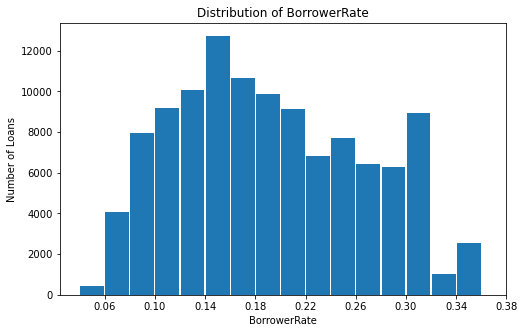

In [3]:
df= df[~(df['BorrowerRate'] < 0.04)]
df= df[~(df['BorrowerRate'] > 0.36)]
binsize = 0.02
bins = np.arange(0.04, df['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', rwidth=0.95, bins=bins, histtype='bar')
plt.xticks([0.06,0.10, 0.14, 0.18, 0.22, 0.26, 0.30, 0.34, 0.38])
plt.xlabel('BorrowerRate')
plt.ylabel('Number of Loans')
plt.title('Distribution of BorrowerRate')
plt.show()

## Distribution of Employment Status


> This plot shows that Employed people have the largest loans, followed by full-time and self-employed. However Part-time, not employed, and retired have the lowest number of loans

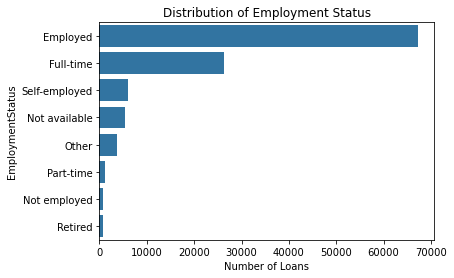

In [4]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other', 'Part-time', 'Not employed', 'Retired']}
base_color = sb.color_palette()[0]
type_order=df['EmploymentStatus'].value_counts().index


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

sb.countplot(data=df, y='EmploymentStatus', color=base_color, order=type_order);
# Change the tick locations and labels
plt.ylabel('EmploymentStatus')
plt.xlabel('Number of Loans')
plt.title('Distribution of Employment Status');

## Distribution of CreditScoreRangeLower vs. BorrowerRate
> The scatter plot of CreditScoreRangeLower vs. BorrowerRate, with log transform shows a negative relationship between the variables. This is because the borrowers with higher/better creditscore received lower interest rate. 

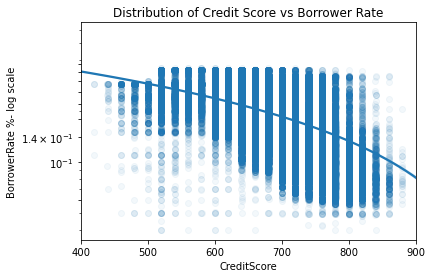

In [5]:
# scatter plot of CreditScoreRangeLower vs. BorrowerRate, with log transform 

sb.regplot(data = df, x = df['CreditScoreRangeLower'], y = df['BorrowerRate'],
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlim([400, 900])
plt.xlabel('CreditScore')
plt.yscale('log')
plt.yticks([0.06,0.10, 0.14, 0.18, 0.22, 0.26, 0.30, 0.34, 0.38])
plt.ylabel('BorrowerRate %- log scale')
plt.title('Distribution of Credit Score vs Borrower Rate')
plt.show()

# Distribution of Employment Status and Type of Loan(Listing Category) vs. BorrowerRate
>The multivariate plot above shows that the full-time borrowers with Green loans and Motorcyle have the lowest rate, vs the un-employed with wedding loans and green loans and full time borrowers with engagement ring loans had the highest rate.  Overall the fulltime and employed see to have the lower interest rates compared to the un-employed, regardless of the the listing category.

Text(0.5, 1.0, 'Employment Status vs Type of Loan vs Borrower Rate')

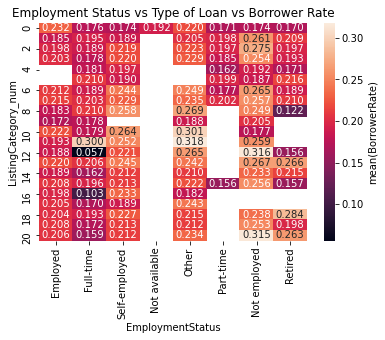

In [6]:
cat_means = df.groupby(['EmploymentStatus', 'ListingCategory_num']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'BorrowerRate_avg')
cat_means = cat_means.pivot(index = 'ListingCategory_num', columns = 'EmploymentStatus',
                            values = 'BorrowerRate_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerRate)'})
plt.title('Employment Status vs Type of Loan vs Borrower Rate')

In [ ]:
!jupyter nbconvert ProsperLoan_Slides.ipynb --to slides --post serve  --no-input --no-prompt 